In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import basketball
import pickle

In [77]:
!ls

EDA.ipynb                 __pycache__               per_36_min.pickle
Getting the tables.ipynb  basketball.py             salaries.pickle
README.md                 cleaning_the_tables.ipynb
Web Scraping.ipynb        database.pickle


In [78]:
with open('per_36_min.pickle', 'rb') as f:
    dfs = pickle.load(f)
    
with open('salaries.pickle', 'rb') as f:
    targets = pickle.load(f)

In [79]:
dfs.keys()

dict_keys(['MIA', 'ORL', 'PHI', 'NYK', 'BOS', 'WAS', 'NJN', 'IND', 'ATL', 'DET', 'MIL', 'CHH', 'TOR', 'CLE', 'CHI', 'SAS', 'UTA', 'HOU', 'MIN', 'DAL', 'DEN', 'VAN', 'POR', 'LAL', 'PHO', 'SAC', 'SEA', 'GSW', 'LAC'])

In [80]:
# focus on San Antonio
sas_sals = targets['SAS']

In [81]:
print(sas_sals.head())
print(dfs['SAS'].head())


0 Rk            Name    Salary
0  1  David Robinson  14841000
1  2    Sean Elliott   5333000
2  3   Charles Smith   4375143
3  4     Will Perdue   4373000
4  5      Tim Duncan   3413000
0 Rk            Name Age   G  GS    MP   FG   FGA   FG%   3P  ...    FT%  ORB  \
0  1      Tim Duncan  22  50  50  1963  7.7  15.5  .495  0.0  ...   .690  2.9   
1  2   Avery Johnson  33  50  50  1672  4.7   9.9  .473  0.0  ...   .568  0.5   
2  3  David Robinson  33  49  49  1554  6.2  12.2  .509  0.0  ...   .658  3.4   
3  4    Sean Elliott  30  50  50  1509  5.0  12.1  .410  0.9  ...   .757  0.8   
4  5      Mario Elie  35  47  37  1291  4.4   9.2  .471  1.1  ...   .866  1.0   

0  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  7.6  10.5  2.2  0.8  2.3  2.7  2.7  19.9  
1  2.1   2.5  7.9  1.1  0.2  2.4  2.2  10.5  
2  8.0  11.4  2.4  1.6  2.8  2.5  3.3  18.0  
3  4.2   5.1  2.8  0.6  0.4  1.7  2.5  13.4  
4  2.8   3.8  2.5  1.3  0.3  1.7  2.5  12.7  

[5 rows x 27 columns]


In [82]:
# let's concatanate all of our data

league = pd.concat([df for df in dfs.values()])
league.reset_index(drop=True, inplace=True)
league.sample(3)
    

0    Rk             Name Age   G  GS    MP   FG   FGA   FG%   3P  ...    FT%  \
143  10        Mark West  38  49   0   499  1.6   4.3  .373  0.0  ...   .356   
280   2  Hakeem Olajuwon  36  50  50  1784  7.5  14.6  .514  0.1  ...   .717   
85    4     Juwan Howard  25  36  36  1430  7.2  15.2  .474  0.0  ...   .753   

0    ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
143  3.5  5.5  9.0  0.9  0.3  1.6  1.2  5.8   4.3  
280  2.1  7.5  9.6  1.8  1.7  2.5  2.8  3.2  19.1  
85   2.3  5.1  7.4  2.7  1.1  0.4  2.4  3.3  17.2  

[3 rows x 27 columns]

In [83]:
league.Name.count()

474

In [84]:
len(league.Name.unique())

440

In [85]:
# how will I handle players that were on multiple teams in a season?

# they have different stats perhaps? They are worth different amounts
# on different teams?

In [86]:
league.Name.value_counts().head()

Doug Overton          3
William Cunningham    2
Jamie Feick           2
Chris Gatling         2
Terry Dehere          2
Name: Name, dtype: int64

In [87]:
doug = (league['Name'] == 'Doug Overton')
league[doug]

0    Rk          Name Age   G GS   MP   FG   FGA   FG%   3P  ...     FT%  ORB  \
29   13  Doug Overton  29   6  0   33  6.5  13.1  .500  0.0  ...   1.000  1.1   
47   14  Doug Overton  29  10  0   37  4.9  14.6  .333  0.0  ...          0.0   
111  15  Doug Overton  29   8  1  174  5.2  11.8  .439  0.4  ...    .857  1.2   

0    DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
29   1.1  2.2  3.3  1.1  0.0  3.3  2.2  19.6  
47   1.9  1.9  3.9  1.0  0.0  1.9  1.9   9.7  
111  2.3  3.5  3.3  0.6  0.2  3.1  2.9  13.2  

[3 rows x 27 columns]

In [88]:
# I think as long as the salary info is unique
# we can proceed with the duplicates

## Joining salary and stats on name

In [105]:
with open('per_36_min.pickle', 'rb') as f:
    dfs = pickle.load(f)
    
with open('salaries.pickle', 'rb') as f:
    targets = pickle.load(f)

In [97]:
stats = dfs['SAS']
sals = targets['SAS']

display(stats.head())
display(sals.head())

0 Rk            Name Age   G  GS    MP   FG   FGA   FG%   3P  ...    FT%  ORB  \
0  1      Tim Duncan  22  50  50  1963  7.7  15.5  .495  0.0  ...   .690  2.9   
1  2   Avery Johnson  33  50  50  1672  4.7   9.9  .473  0.0  ...   .568  0.5   
2  3  David Robinson  33  49  49  1554  6.2  12.2  .509  0.0  ...   .658  3.4   
3  4    Sean Elliott  30  50  50  1509  5.0  12.1  .410  0.9  ...   .757  0.8   
4  5      Mario Elie  35  47  37  1291  4.4   9.2  .471  1.1  ...   .866  1.0   

0  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  7.6  10.5  2.2  0.8  2.3  2.7  2.7  19.9  
1  2.1   2.5  7.9  1.1  0.2  2.4  2.2  10.5  
2  8.0  11.4  2.4  1.6  2.8  2.5  3.3  18.0  
3  4.2   5.1  2.8  0.6  0.4  1.7  2.5  13.4  
4  2.8   3.8  2.5  1.3  0.3  1.7  2.5  12.7  

[5 rows x 27 columns]

0 Rk            Name    Salary
0  1  David Robinson  14841000
1  2    Sean Elliott   5333000
2  3   Charles Smith   4375143
3  4     Will Perdue   4373000
4  5      Tim Duncan   3413000

In [100]:
# stats.sort_values('Name', inplace=True)
# sals.sort_values('Name', inplace=True)
# stats.drop('Rk', axis=1, inplace=True)
sals.drop('Rk', axis=1, inplace=True)

In [101]:
pd.concat([stats.set_index('Name'), sals.set_index('Name')], axis=1, join='inner')

0                 Rk Age   G  GS    MP   FG   FGA   FG%   3P  3PA    ...     \
Name                                                                 ...      
Tim Duncan         1  22  50  50  1963  7.7  15.5  .495  0.0  0.1    ...      
Avery Johnson      2  33  50  50  1672  4.7   9.9  .473  0.0  0.3    ...      
David Robinson     3  33  49  49  1554  6.2  12.2  .509  0.0  0.0    ...      
Sean Elliott       4  30  50  50  1509  5.0  12.1  .410  0.9  2.8    ...      
Mario Elie         5  35  47  37  1291  4.4   9.2  .471  1.1  3.0    ...      
Steve Kerr         7  33  44   0   734  3.3   8.5  .391  1.2  3.9    ...      
Jerome Kersey      8  36  45   0   699  3.5  10.3  .340  0.2  0.7    ...      
Antonio Daniels    9  23  47   0   614  4.9  10.7  .454  0.3  1.0    ...      
Malik Rose        10  24  47   0   608  5.5  11.9  .463  0.0  0.1    ...      
Will Perdue       11  33  37   1   445  3.1   4.9  .633  0.0  0.0    ...      
Andrew Gaze       13  33  19   0    58  5.0  15.5  .320  3.1  9.9    ...      
Brandon Williams  14  23   3   0     4  0.0   0.0        0.0  0.0    ...      

0                 ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS    Salary  
Name                                                                       
Tim Duncan        2.9  7.6  10.5  2.2  0.8  2.3  2.7  2.7  19.9   3413000  
Avery Johnson     0.5  2.1   2.5  7.9  1.1  0.2  2.4  2.2  10.5   3000000  
David Robinson    3.4  8.0  11.4  2.4  1.6  2.8  2.5  3.3  18.0  14841000  
Sean Elliott      0.8  4.2   5.1  2.8  0.6  0.4  1.7  2.5  13.4   5333000  
Mario Elie        1.0  2.8   3.8  2.5  1.3  0.3  1.7  2.5  12.7   1750000  
Steve Kerr        0.3  1.9   2.2  2.4  1.1  0.1  1.1  1.4   9.4   1774000  
Jerome Kersey     2.2  4.5   6.7  2.1  1.9  0.7  1.5  4.7   7.5   1000000  
Antonio Daniels   0.8  2.4   3.2  6.2  1.8  0.4  2.6  2.3  12.9   2472000  
Malik Rose        5.3  5.4  10.8  1.7  2.4  1.3  3.3  7.1  16.8    425000  
Will Perdue       2.7  8.5  11.2  1.5  0.7  0.8  1.8  5.1   7.3   4373000  
Andrew Gaze       1.2  1.9   3.1  3.7  1.2  0.6  2.5  4.3  13.0    350000  
Brandon Williams  9.0  0.0   9.0  0.0  0.0  0.0  0.0  0.0  18.0    287500  

[12 rows x 27 columns]

## Joining stats and salaries for all teams

In [106]:
data = []

for team in dfs.keys():
    df = dfs[team]
    sal = targets[team]
    sal.drop('Rk', axis=1, inplace=True)
    new_df = pd.concat([df.set_index('Name'), sal.set_index('Name')], axis=1, join='inner')
    data.append(new_df)
    
# one additional thing to look at is to have a team column, just for my
# personal reference.  
    

[0                Rk Age   G  GS    MP   FG   FGA   FG%   3P  3PA    ...     \
 Name                                                                ...      
 Tim Hardaway      1  32  48  48  1772  6.1  15.3  .400  2.3  6.3    ...      
 Alonzo Mourning   2  28  46  46  1753  6.7  13.0  .511  0.0  0.0    ...      
 Dan Majerle       3  33  48  48  1624  2.6   6.6  .396  1.5  4.5    ...      
 P.J. Brown        4  29  50  50  1611  5.1  10.7  .480  0.0  0.0    ...      
 Terry Porter      5  35  50   1  1365  4.5   9.8  .465  1.5  3.7    ...      
 Jamal Mashburn    7  26  24  23   855  5.6  12.5  .451  0.5  1.3    ...      
 Rex Walters       8  28  33  13   506  2.5   6.8  .368  0.9  2.7    ...      
 Keith Askins      9  31  33  13   415  1.7   5.4  .323  0.7  2.5    ...      
 Mark Strickland  10  28  32   1   357  5.0  10.2  .495  0.0  0.1    ...      
 Blue Edwards     11  33  24   0   283  4.1   9.2  .444  0.5  1.3    ...      
 Voshon Lenard    12  25  12   2   190  5.9  15.0  .

In [108]:
# concatanate data

final_df = pd.concat(data)
final_df

0                   Rk Age   G  GS    MP   FG   FGA   FG%   3P  3PA    ...     \
Name                                                                   ...      
Tim Hardaway         1  32  48  48  1772  6.1  15.3  .400  2.3  6.3    ...      
Alonzo Mourning      2  28  46  46  1753  6.7  13.0  .511  0.0  0.0    ...      
Dan Majerle          3  33  48  48  1624  2.6   6.6  .396  1.5  4.5    ...      
P.J. Brown           4  29  50  50  1611  5.1  10.7  .480  0.0  0.0    ...      
Terry Porter         5  35  50   1  1365  4.5   9.8  .465  1.5  3.7    ...      
Jamal Mashburn       7  26  24  23   855  5.6  12.5  .451  0.5  1.3    ...      
Rex Walters          8  28  33  13   506  2.5   6.8  .368  0.9  2.7    ...      
Keith Askins         9  31  33  13   415  1.7   5.4  .323  0.7  2.5    ...      
Mark Strickland     10  28  32   1   357  5.0  10.2  .495  0.0  0.1    ...      
Blue Edwards        11  33  24   0   283  4.1   9.2  .444  0.5  1.3    ...      
Voshon Lenard       12  25  12   2   190  5.9  15.0  .392  2.3  6.6    ...      
Duane Causwell      13  30  19   1   137  5.3   9.2  .571  0.0  0.0    ...      
Marty Conlon        15  31   7   0    35  3.1  13.4  .231  0.0  0.0    ...      
Terry Mills         16  31   1   0    29  3.7   9.9  .375  2.5  5.0    ...      
Anfernee Hardaway    1  27  50  50  1944  5.6  13.3  .420  0.7  2.6    ...      
Horace Grant         2  33  50  50  1660  4.3   9.9  .434  0.0  0.0    ...      
Nick Anderson        3  31  47  39  1581  5.8  14.6  .395  2.2  6.3    ...      
Darrell Armstrong    4  30  50  15  1502  5.5  12.5  .441  1.7  4.5    ...      
Isaac Austin         5  29  49  49  1259  5.3  13.0  .408  0.1  0.2    ...      
Matt Harpring        6  22  50  22  1114  4.8  10.3  .463  0.3  0.8    ...      
Bo Outlaw            7  27  31  22   851  3.6   6.5  .545  0.0  0.1    ...      
Michael Doleac       8  21  49   0   780  5.8  12.3  .468  0.0  0.0    ...      
Derek Strong         9  30  44   0   695  3.9   9.3  .422  0.0  0.1    ...      
Dominique Wilkins   10  39  27   2   252  7.1  18.9  .379  0.7  2.7    ...      
B.J. Armstrong      11  31  22   0   180  3.8   9.0  .422  0.2  1.4    ...      
Danny Schayes       12  39  19   1   143  2.8   7.3  .379  0.0  0.0    ...      
Gerald Wilkins      14  35   3   0    28  0.0  11.6  .000  0.0  0.0    ...      
Miles Simon         15  23   5   0    19  1.9   9.5  .200  0.0  3.8    ...      
Jonathan Kerner     16  24   1   0     5  0.0   7.2  .000  0.0  0.0    ...      
Allen Iverson        1  23  48  48  1990  7.9  19.1  .412  1.0  3.6    ...      
...                 ..  ..  ..  ..   ...  ...   ...   ...  ...  ...    ...      
Rashard Lewis       14  19  20   7   145  4.7  12.9  .365  0.2  1.5    ...      
Moochie Norris      15  25  12   0   140  3.3  10.3  .325  1.5  3.9    ...      
John Starks          1  33  50  50  1686  5.7  15.5  .370  1.7  5.7    ...      
Erick Dampier        2  23  50  50  1414  4.1  10.5  .389  0.0  0.0    ...      
Chris Mills          3  29  47  24  1395  4.8  11.7  .411  0.8  3.0    ...      
Bimbo Coles          4  30  48  32  1272  5.2  11.7  .442  0.2  0.7    ...      
Donyell Marshall     5  25  48  20  1250  6.0  14.2  .421  0.7  2.1    ...      
Antawn Jamison       6  22  47  24  1058  6.1  13.4  .452  0.1  0.3    ...      
Terry Cummings       7  37  50   0  1011  6.6  15.1  .439  0.0  0.0    ...      
Jason Caffey         8  25  35  32   876  5.1  11.4  .444  0.0  0.0    ...      
Muggsy Bogues        9  34  36   5   714  3.8   7.8  .494  0.0  0.3    ...      
Tony Delk           10  25  36  13   630  5.3  14.5  .364  0.9  3.8    ...      
Adonal Foyle        11  23  44   0   614  3.0   7.1  .430  0.0  0.0    ...      
Felton Spencer      12  31  26   0   159  3.4   7.5  .455  0.0  0.0    ...      
Duane Ferrell       13  33   8   0    46  0.8  11.0  .071  0.0  0.0    ...      
Maurice Taylor       1  22  46  45  1505  7.4  16.1  .461  0.0  0.1    ...      
Lamond Murray        2  25  50 

In [116]:
final_df = final_df.apply(pd.to_numeric)

/Users/maxwellclarke/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/maxwellclarke/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


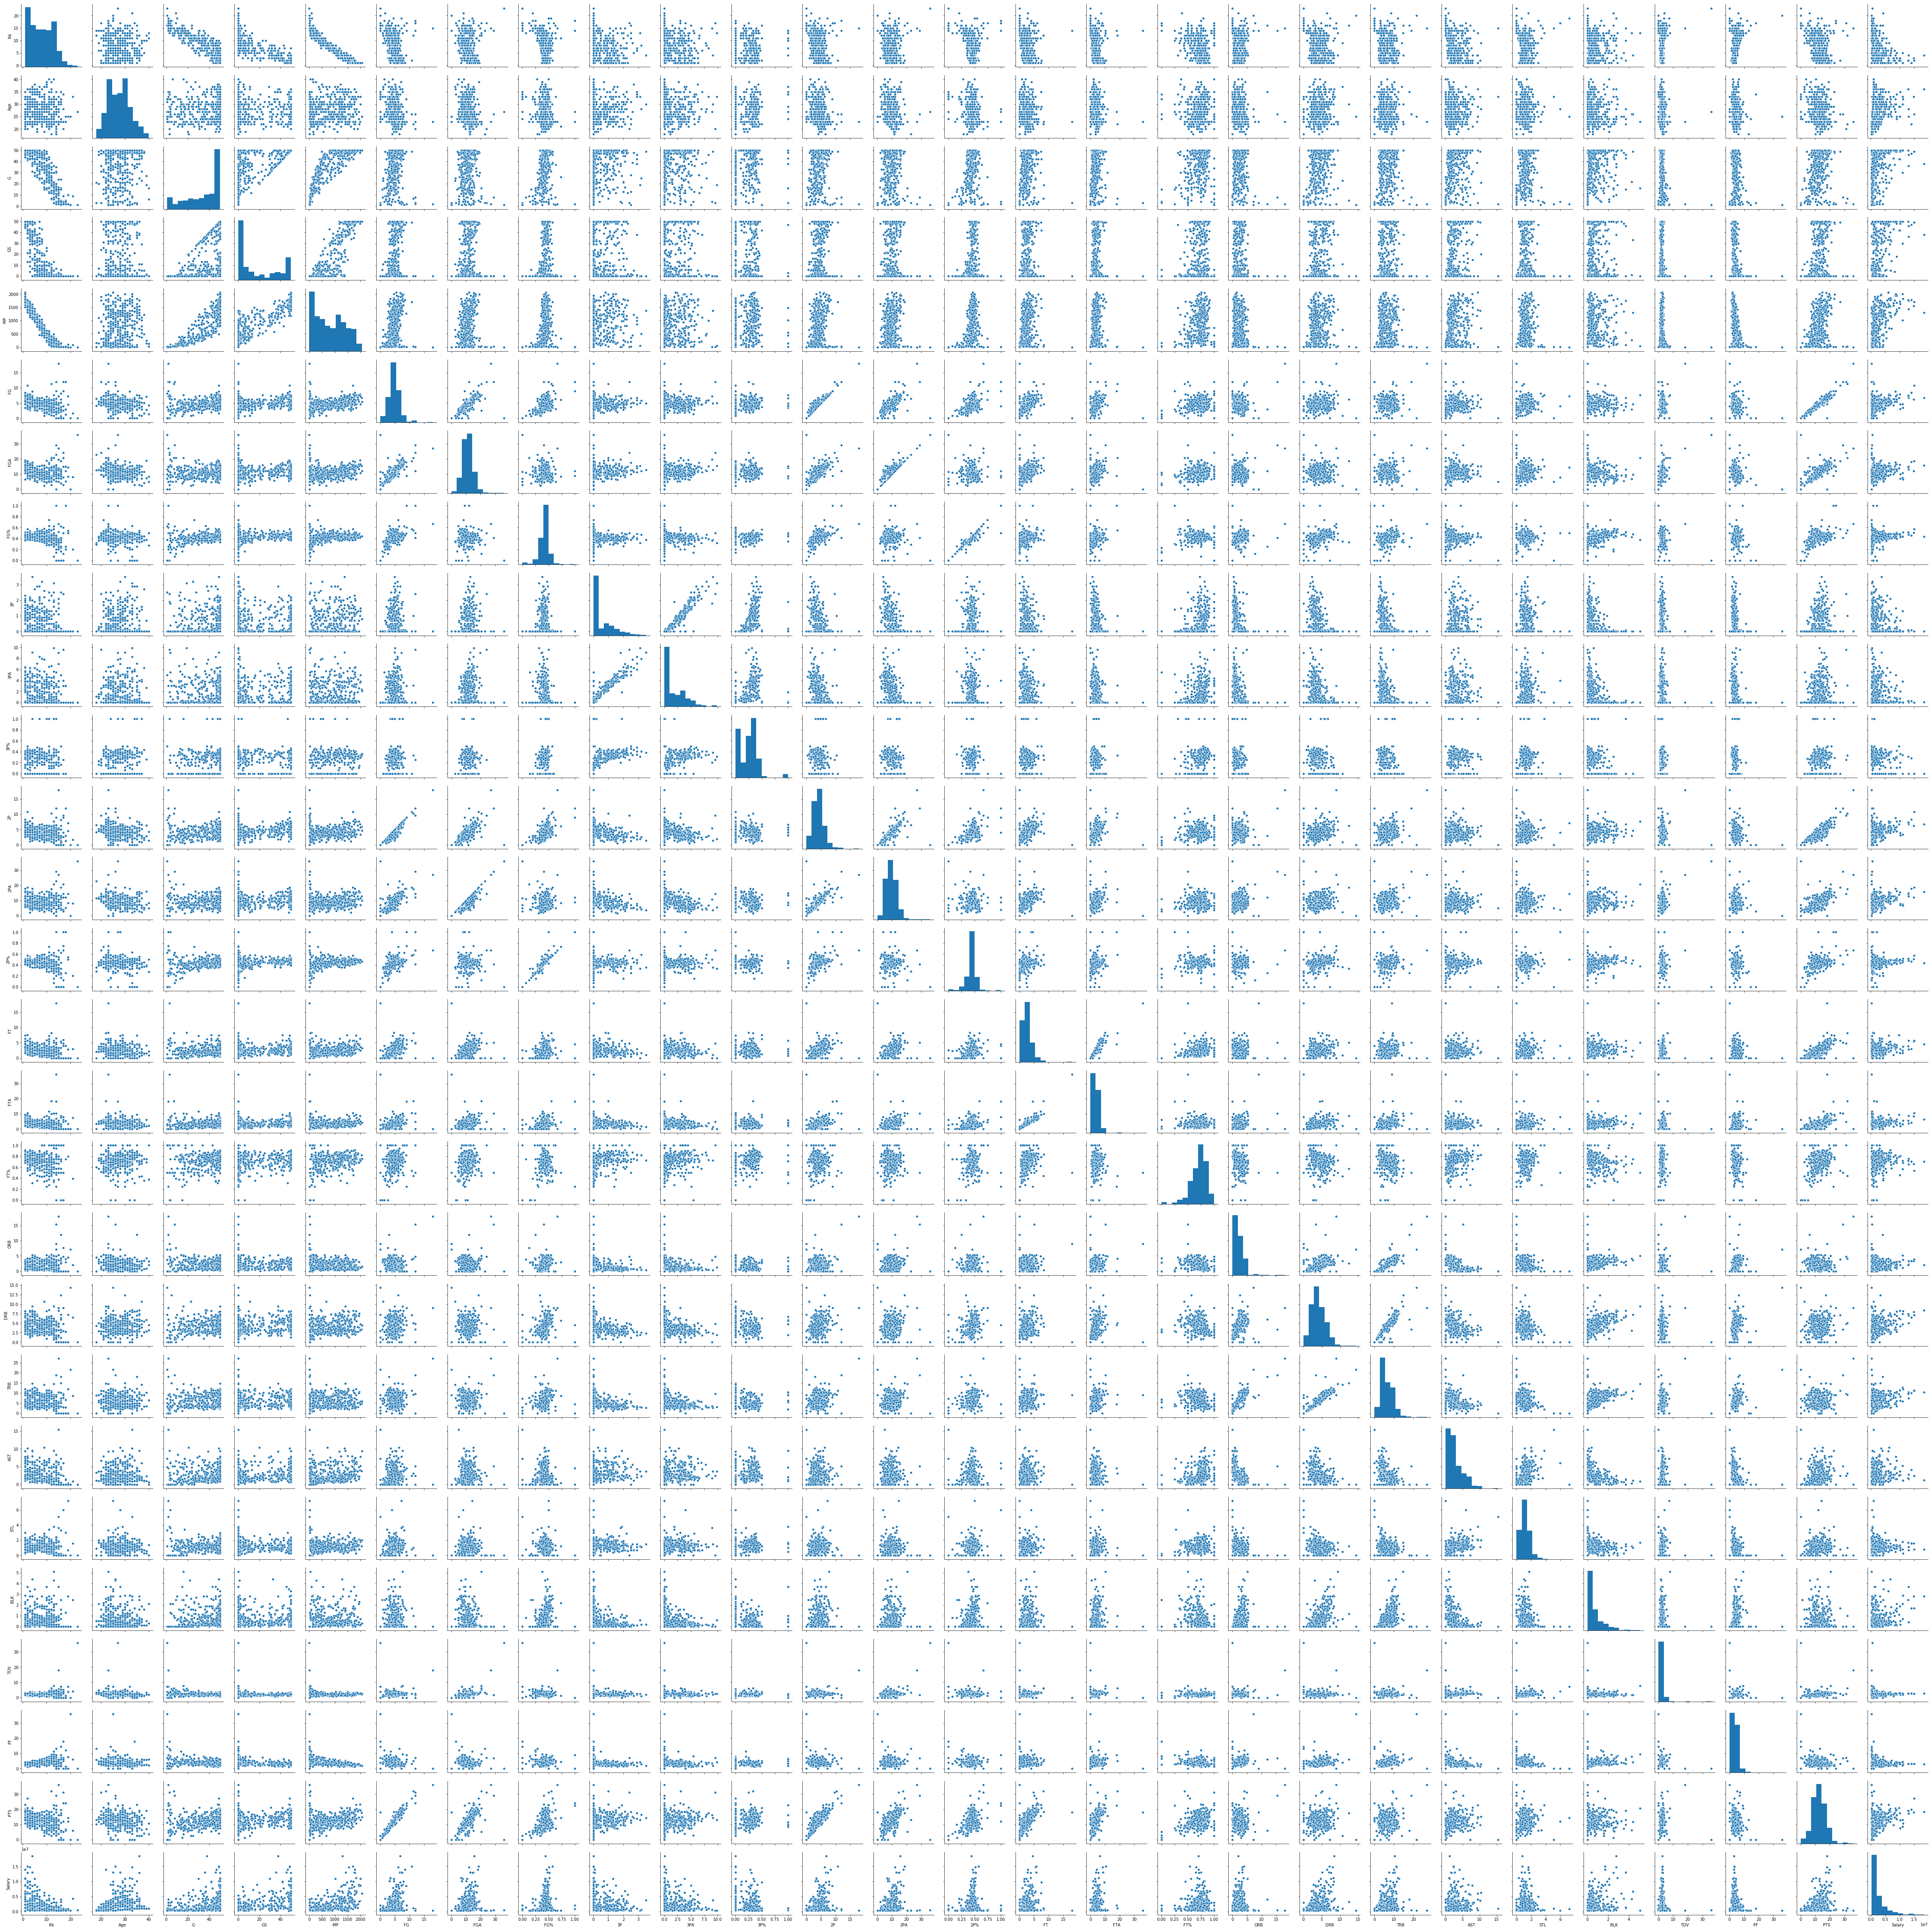

In [117]:
sns.pairplot(final_df)

In [120]:
# CORRELATIONS WITH SALARY
final_df.corr().sort_values('Salary')['Salary']

0
Rk       -0.493571
PF       -0.176819
3PA      -0.117355
3P%      -0.116598
3P       -0.088587
TOV      -0.042273
STL      -0.015815
ORB       0.013816
FT%       0.067614
AST       0.070152
2P%       0.154791
FTA       0.176386
FGA       0.177487
FG%       0.193449
TRB       0.199607
Age       0.232740
2PA       0.234655
FT        0.238259
BLK       0.252291
FG        0.279271
PTS       0.293230
2P        0.303083
DRB       0.317692
G         0.336975
GS        0.539360
MP        0.551441
Salary    1.000000
Name: Salary, dtype: float64